In [2]:
import pandas as pd
import numpy as np
import openpyxl

df = pd.read_excel('MOCK_DATA.xlsx')
df

,payment_id,invoice_number,billing_date,amount_due,payment_method,payment_status,customer_name,billing_address,DaysPending
0,1,1031,1/21/2022,9503,Bank Transfer,Paid,Lida Chillistone,Room 1056,158
1,2,1887,3/25/2022,3622,PayPal,Pending,Heida Mateu,Suite 49,400
2,3,4108,2/24/2022,3250,Credit Card,Paid,Myrwyn Oliveto,Suite 18,178
3,4,5350,11/30/2022,276,Credit Card,Pending,Simone Beasant,Apt 1843,826
4,5,6099,12/11/2022,5460,Bank Transfer,Pending,Gordon MacCracken,Suite 68,474
...,...,...,...,...,...,...,...,...,...
995,996,4477,7/28/2022,1549,Credit Card,Pending,Jewelle Poll,15th Floor,625
996,997,9630,9/21/2022,3233,Credit Card,Paid,Terrel Seary,Suite 91,159
997,998,8563,5/10/2022,3687,Credit Card,Pending,Petronille Hayto,Apt 936,663
998,999,9122,5/18/2022,8552,PayPal,Paid,Lisabeth Kauscher,Apt 172,554


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   payment_id       1000 non-null   int64 
 1   invoice_number   1000 non-null   int64 
 2   billing_date     1000 non-null   object
 3   amount_due       1000 non-null   int64 
 4   payment_method   1000 non-null   object
 5   payment_status   1000 non-null   object
 6   customer_name    1000 non-null   object
 7   billing_address  1000 non-null   object
 8   DaysPending      1000 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 70.4+ KB


In [4]:
df.describe()

,payment_id,invoice_number,amount_due,DaysPending
count,1000.000000,1000.000000,1000.000000,1000.000000
mean,500.500000,5528.375000,4931.712000,453.968000
std,288.819436,2611.202019,2925.825325,256.724382
min,1.000000,1017.000000,4.000000,15.000000
25%,250.750000,3406.750000,2336.500000,228.750000
50%,500.500000,5361.000000,5001.500000,457.500000
75%,750.250000,7894.500000,7473.250000,677.000000
max,1000.000000,9997.000000,10000.000000,900.000000


array([[<Axes: title={'center': 'payment_id'}>,
        <Axes: title={'center': 'invoice_number'}>],
       [<Axes: title={'center': 'amount_due'}>,
        <Axes: title={'center': 'DaysPending'}>]], dtype=object)

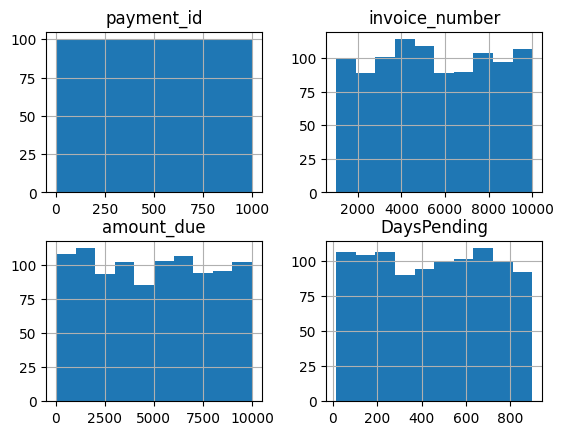

In [5]:
df.hist()

In [6]:
df = df.drop(columns=['payment_id', 'invoice_number', 'customer_name', 'billing_address', 'billing_date'])

In [7]:
df.isna().sum()

amount_due        0
payment_method    0
payment_status    0
DaysPending       0
dtype: int64

In [8]:
#Detectar los campos con strings y categorizarlos
df['payment_status'].unique()


array(['Paid', 'Pending', 'Overdue'], dtype=object)

In [9]:
#Cambiar valores de tipo texto en numeros
valores_estado = {'payment_status': {'Paid':1, 'Pending':2, 'Overdue':3}}
df.replace(valores_estado, inplace=True)

valores_metodo = {'payment_method': {'Bank Transfer':1, 'PayPal':2,'Credit Card': 3}}
df.replace(valores_metodo, inplace=True)

df


C:\Users\KEVIN\AppData\Local\Temp\ipykernel_4620\1139896983.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(valores_estado, inplace=True)
C:\Users\KEVIN\AppData\Local\Temp\ipykernel_4620\1139896983.py:6: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.replace(valores_metodo, inplace=True)


,amount_due,payment_method,payment_status,DaysPending
0,9503,1,1,158
1,3622,2,2,400
2,3250,3,1,178
3,276,3,2,826
4,5460,1,2,474
...,...,...,...,...
995,1549,3,2,625
996,3233,3,1,159
997,3687,3,2,663
998,8552,2,1,554


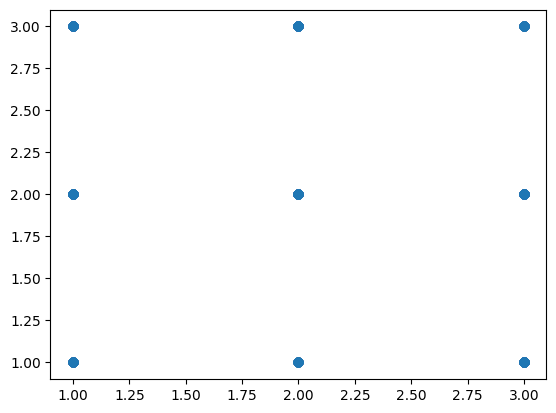

In [10]:
import matplotlib.pyplot as plt
plt.scatter(x = df['payment_method'], y = df['payment_status'])
plt.show()

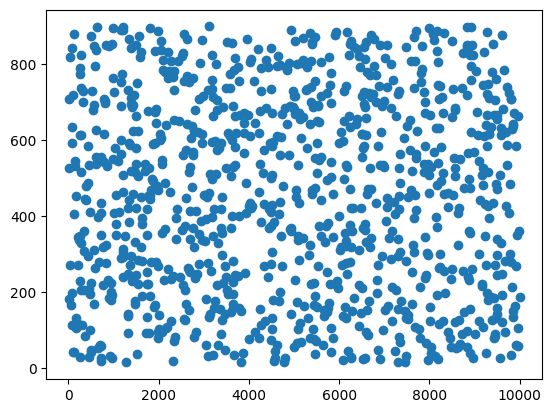

In [11]:
# df = df.query('amount_due < 800')
# df = df.query('DaysPending > 800')
plt.scatter(x = df['amount_due'], y = df['DaysPending'])
plt.show()

In [12]:
dataTrain = df.sample(frac=0.8, random_state=0)
dataTest = df.drop(dataTrain.index)

In [13]:
dataTrain

,amount_due,payment_method,payment_status,DaysPending
993,9435,2,3,79
859,1397,1,3,519
298,2522,2,2,364
553,9832,2,1,214
672,7070,3,1,424
...,...,...,...,...
117,2688,2,1,415
464,9506,1,2,667
25,6535,3,1,581
110,5988,1,3,592


In [14]:
tagTrain = dataTrain.pop('payment_status')
tagTest = dataTest.pop('payment_status')

In [15]:
from sklearn.linear_model import LinearRegression

modelo = LinearRegression()
modelo.fit(dataTrain,tagTrain)

LinearRegression()

In [16]:
predicciones = modelo.predict(dataTest)

predicciones

array([2.0496281 , 1.99176178, 1.95962075, 1.99390878, 2.03210598,
       2.08539484, 1.96443986, 1.9793441 , 2.02347099, 2.06385189,
       1.99149318, 2.06868433, 1.97130744, 2.06847144, 2.06337695,
       2.0302951 , 1.99767028, 2.00336559, 1.99391277, 1.9783346 ,
       2.03207268, 2.09233939, 2.01565871, 2.09724651, 2.01226258,
       1.98306685, 2.06015129, 1.97959454, 2.08224173, 1.99229728,
       2.0278968 , 2.03310982, 2.06158512, 2.05899261, 2.02175486,
       1.99146608, 2.03293574, 2.01838376, 2.05559791, 1.98671963,
       2.06098248, 2.06678795, 2.03456196, 1.98826453, 1.98537503,
       1.99654477, 1.99134324, 2.00531058, 2.02303434, 2.04050795,
       1.96739355, 1.99566669, 2.07418836, 1.96283166, 2.08224739,
       2.09515665, 2.07244424, 2.01186168, 2.04285021, 1.9620116 ,
       2.02907272, 2.00777314, 2.02024775, 1.97382033, 2.03703225,
       1.98677105, 2.029881  , 2.02767862, 2.06624111, 1.97498342,
       2.05449223, 2.02788066, 2.08896915, 2.01763052, 2.08644

In [17]:
from sklearn.metrics import mean_squared_error

error = np.sqrt(mean_squared_error(tagTest, predicciones))

print("error porcentual : %f" % (error*100))

error porcentual : 83.542326


In [23]:
newData = pd.DataFrame(np.array([[3000,100,1,2]]), columns=['amount_due', 'DaysPending', 'payment_method', 'payment_status'])	
newData

,amount_due,DaysPending,payment_method,payment_status
0,3000,100,1,2


In [24]:
modelo.predict(newData)

ValueError: The feature names should match those that were passed during fit.
Feature names unseen at fit time:
- payment_status
